# User overview Analytics

Import all neccessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
import os, sys
sys.path.insert(0,'../scripts/')
from Graphical_view import *
from Pre_Proccess import Pre_Process
from data_display import DataFrame

Load data that I hve cleaned and save before

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

telecom = pd.read_csv('../data/cleaned_data.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
telecom.head()

Unnamed: 0               Bearer Id                Start  Start ms  \
0           0 13114483460844900352.00  2019-04-04 12:01:00    770.00   
1           1 13114483482878900224.00  2019-04-09 13:04:00    235.00   
2           2 13114483484080500736.00  2019-04-09 17:42:00      1.00   
3           3 13114483485442799616.00  2019-04-10 00:31:00    486.00   
4           4 13114483499480700928.00  2019-04-12 20:10:00    565.00   

                   End  End ms  Dur. (ms)               IMSI  MSISDN/Number  \
0  2019-04-25 14:35:00  662.00 1823652.00 208201448079117.00 33664962239.00   
1  2019-04-25 08:15:00  606.00 1365104.00 208201909211140.00 33681854413.00   
2  2019-04-25 11:58:00  652.00 1361762.00 208200314458056.00 33760627129.00   
3  2019-04-25 07:36:00  171.00 1321509.00 208201402342131.00 33750343200.00   
4  2019-04-25 10:40:00  954.00 1089009.00 208201401415120.00 33699795932.00   

               IMEI  ... Youtube DL (Bytes)  Youtube UL (Bytes)  \
0 35521209507511.00  ...        15854611.00          2501332.00   
1 35794009006359.00  ...        20247395.00         19111729.00   
2 35281510359387.00  ...        19725661.00         14699576.00   
3 35356610164913.00  ...        21388122.00         15146643.00   
4 35407009745539.00  ...        15259380.00         18962873.00   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0          8198936.00          9656251.00       278082303.00   
1         18338413.00         17227132.00       608750074.00   
2         17587794.00          6163408.00       229584621.00   
3         13994646.00          1097942.00       799538153.00   
4         17124581.00           415218.00       527707248.00   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0        14344150.00      171744450.00        8814393.00       36749741.00   
1         1170709.00      526904238.00       15055145.00       53800391.00   
2          395630.00      410692588.00        4215763.00       27883638.00   
3        10849722.00      749039933.00       12797283.00       43324218.00   
4         3529801.00      550709500.00       13910322.00       38542814.00   

   Total DL (Bytes)  
0      308879636.00  
1      653384965.00  
2      279807335.00  
3      846028530.00  
4      569138589.00  

[5 rows x 46 columns]

The column names, how many data points,number of colum etc. All these questions needs to be answered

In [4]:
#info of columns
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      148506 non-null  int64  
 1   Bearer Id                       148506 non-null  float64
 2   Start                           148506 non-null  object 
 3   Start ms                        148506 non-null  float64
 4   End                             148506 non-null  object 
 5   End ms                          148506 non-null  float64
 6   Dur. (ms)                       148506 non-null  float64
 7   IMSI                            148506 non-null  float64
 8   MSISDN/Number                   148506 non-null  float64
 9   IMEI                            148506 non-null  float64
 10  Last Location Name              148506 non-null  object 
 11  Avg RTT DL (ms)                 148506 non-null  float64
 12  Avg RTT UL (ms) 

In [5]:
#describe the columns data
telecom.describe()

Unnamed: 0               Bearer Id  Start ms    End ms  Dur. (ms)  \
count   148506.00               148506.00 148506.00 148506.00  148506.00   
mean     75155.49 10146757650164631552.00    499.21    498.64  105084.05   
std      43278.31  2893261633271239168.00    288.56    288.07   81072.74   
min          0.00  6917537518543529984.00      0.00      0.00    7142.00   
25%      37803.25  7349883247462785024.00    250.00    251.00   58248.75   
50%      75065.50  7349883264172940288.00    499.00    500.00   86399.00   
75%     112690.75 13042425978973898752.00    749.00    749.00  132932.75   
max     149999.00 13186541167134199808.00    999.00    999.00 1859336.00   

                    IMSI      MSISDN/Number              IMEI  \
count          148506.00          148506.00         148506.00   
mean  208201599922257.50     41906541782.21 48500684616792.44   
std       15243472825.67   2450975846357.31 22432166298203.65   
min   204047108489451.00     33601001722.00   440015202000.00   
25%   208201401264008.00     33651311444.25 35460708962514.00   
50%   208201546332650.50     33663708556.00 35722309017450.00   
75%   208201771619073.25     33683515176.75 86119704824101.00   
max   208252167239575.00 882397108489451.00 99001201327774.00   

       Avg RTT DL (ms)  Avg RTT UL (ms)  ...  Youtube DL (Bytes)  \
count        148506.00        148506.00  ...           148506.00   
mean            106.20            17.63  ...         11633868.43   
std             529.63            76.47  ...          6711236.45   
min               0.00             0.00  ...               53.00   
25%              35.00             3.00  ...          5833290.25   
50%              54.00             7.00  ...         11615961.50   
75%             106.20            17.63  ...         17446392.25   
max           96923.00          7120.00  ...         23259098.00   

       Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
count           148506.00           148506.00           148506.00   
mean          11008567.70         11627241.74         11001902.34   
std            6345625.17          6724993.74          6357929.85   
min                105.00               42.00               35.00   
25%            5515832.00          5778898.50          5476773.75   
50%           11012318.00         11642380.00         10999370.50   
75%           16514556.25         17470916.50         16502847.75   
max           22011962.00         23259189.00         22011955.00   

       Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
count          148506.00          148506.00         148506.00   
mean        422064222.70         8289599.59      421152465.36   
std         244004290.26         4781966.86      243163937.39   
min              2516.00              59.00           3290.00   
25%         210476489.00         4130680.00      210304184.50   
50%         423466906.50         8291649.50      421861759.00   
75%         633274979.00        12432259.75      631633770.00   
max         843441889.00        16558794.00      843442489.00   

       Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count         148506.00         148506.00         148506.00  
mean         8262685.05       41119372.80      454664032.00  
std          4768806.07       11278441.20      244179073.24  
min              148.00        2866892.00        7114041.00  
25%          4144178.75       33218278.00      243126304.25  
50%          8266016.00       41141959.50      455940800.50  
75%         12380494.00       49032524.00      665754159.25  
max         16558816.00       78331311.00      902969616.00  

[8 rows x 41 columns]

In [6]:
telecom.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
# column names
telecom[['Dur. (ms).1']].describe()

Dur. (ms).1
count     148506.00
mean   105084600.60
std     81072729.72
min      7142988.00
25%     58249644.50
50%     86399986.00
75%    132933303.50
max   1859336442.00

In [8]:
# number of data points
print(f" There are {telecom.shape[0]} rows and {telecom.shape[1]} columns")

 There are 148506 rows and 45 columns


##### Full User Overview analysis

Identify

- Top 10 handsets used by the customers
- Top 3 handset manufacturers
- Top 5 handsets per top 3 handset manufacturer
#### Interpretation and recommendation to marketing teams
##### Top 10 handsets used by the customers

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: count, dtype: int64

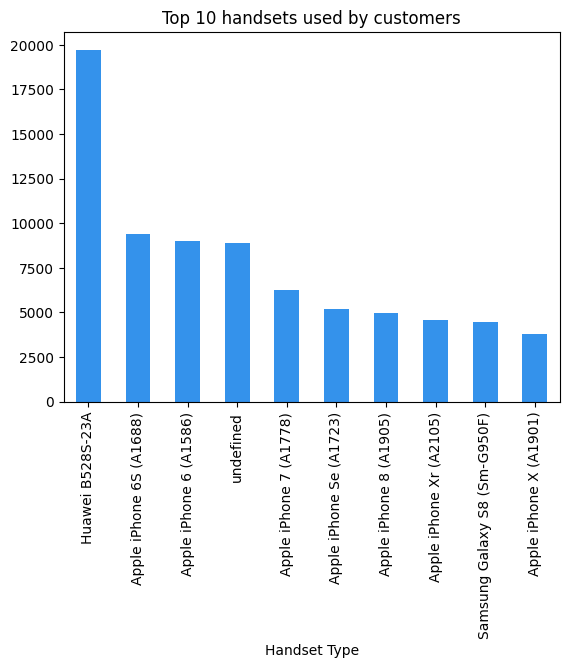

In [9]:
#Top 10 handsets used by the customers
handset_type= telecom['Handset Type'].value_counts()[0:10]
handset_type.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')
handset_type

I encountered rows with undefined. Let's to calculate it impact by calculating frequency

In [10]:
# Percentage of 'undefined' entries
undefined_count = telecom['Handset Type'].value_counts().get('undefined', 0)
total_count = len(telecom['Handset Type'])
undefined_percentage = (undefined_count / total_count) * 100
print(f"'undefined' entries: {undefined_count} ({undefined_percentage:.2f}%)")


'undefined' entries: 8904 (6.00%)


the undefined entry has a minimal impact. so let's remove it

In [11]:
telecom = telecom[telecom['Handset Type'] != 'undefined']


Let's show again top 10

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Samsung Galaxy A5 Sm-A520F       3700
Name: count, dtype: int64

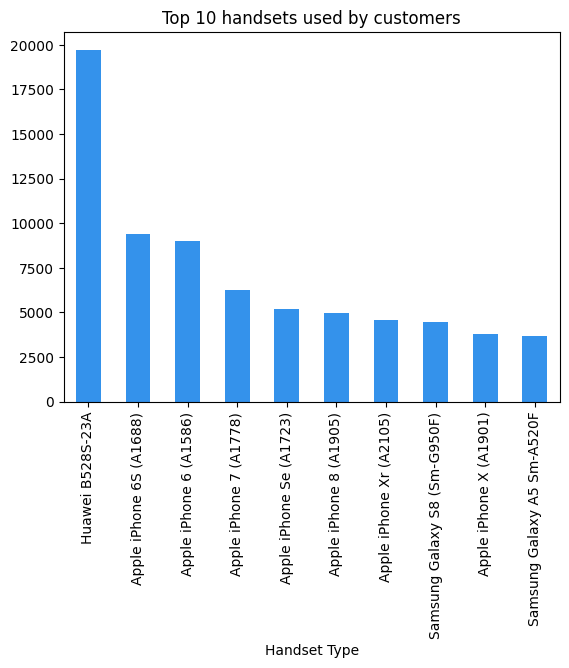

In [12]:
handset_type= telecom['Handset Type'].value_counts()[0:10]
handset_type.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')
handset_type

##### Top 3 handset manufacturers

Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64

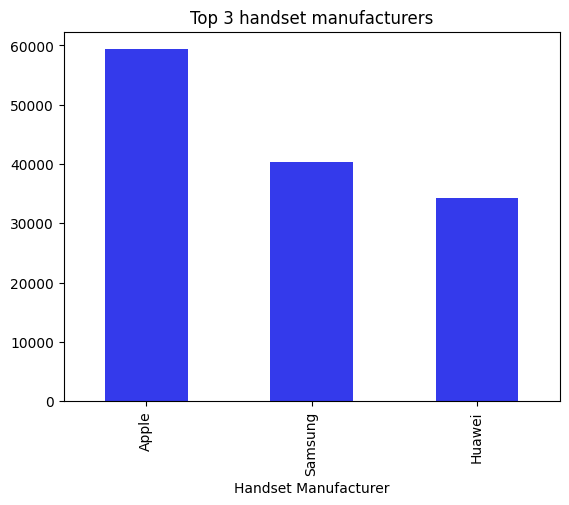

In [13]:
Handset_manu = telecom['Handset Manufacturer'].value_counts()[0:3]
Handset_manu.plot.bar(x='Handset Manufacturer', title="Top 3 handset manufacturers", stacked=True, color='#343aeb')
Handset_manu

##### Top 5 handsets per top 3 handset manufacturer

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9395
                     Apple iPhone 6 (A1586)    8993
                     Apple iPhone 7 (A1778)    6279
                     Apple iPhone Se (A1723)   5165
                     Apple iPhone 8 (A1905)    4977

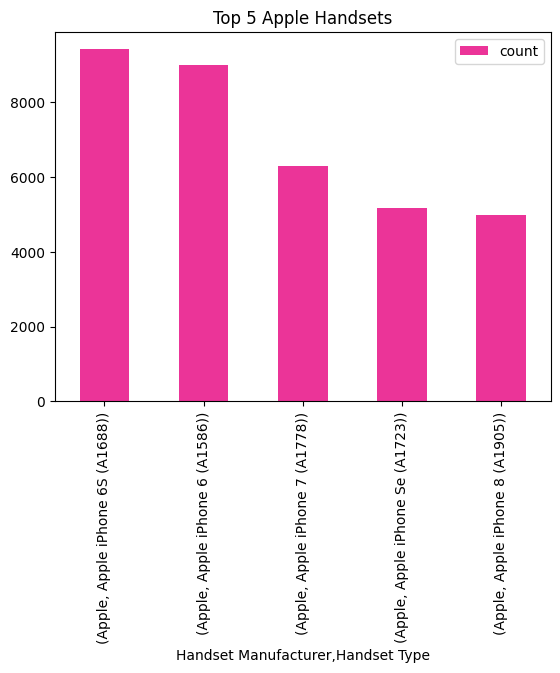

In [14]:
#Top apple manufacturer handset
top_apple = telecom.loc[telecom['Handset Manufacturer'] == 'Apple']
top_apple = top_apple.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_apple.columns = ['count']
top_apple=top_apple.nlargest(5, 'count')
top_apple.plot.bar(y='count', title="Top 5 Apple Handsets", stacked=True, color='#eb3498')
top_apple

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4464
                     Samsung Galaxy A5 Sm-A520F     3700
                     Samsung Galaxy J5 (Sm-J530)    3675
                     Samsung Galaxy J3 (Sm-J330)    3456
                     Samsung Galaxy S7 (Sm-G930X)   3171

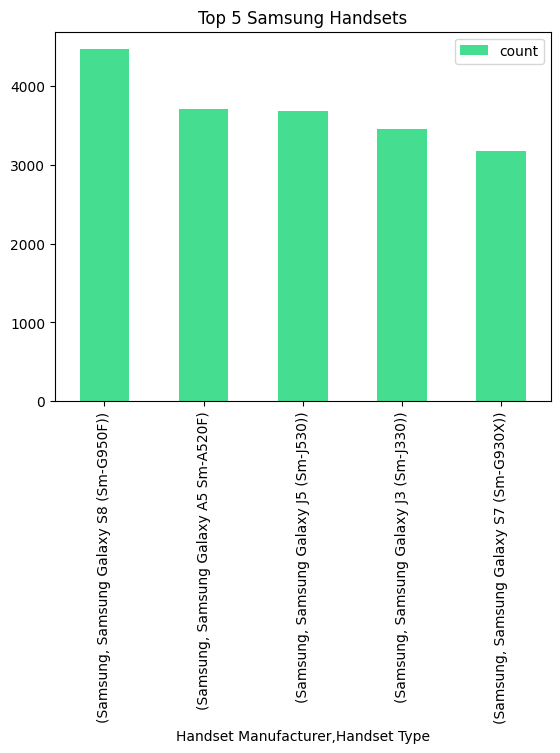

In [15]:
#Top samsung manufacturer handset
top_samsung = telecom.loc[telecom['Handset Manufacturer'] == 'Samsung']
top_samsung = top_samsung.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_samsung.columns = ['count']
top_samsung=top_samsung.nlargest(5, 'count')
top_samsung.plot.bar(y='count', title="Top 5 Samsung Handsets", stacked=True, color='#45De90')
top_samsung

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19727
                     Huawei E5180                     2074
                     Huawei P20 Lite Huawei Nova 3E   2012
                     Huawei P20                       1475
                     Huawei Y6 2018                    996

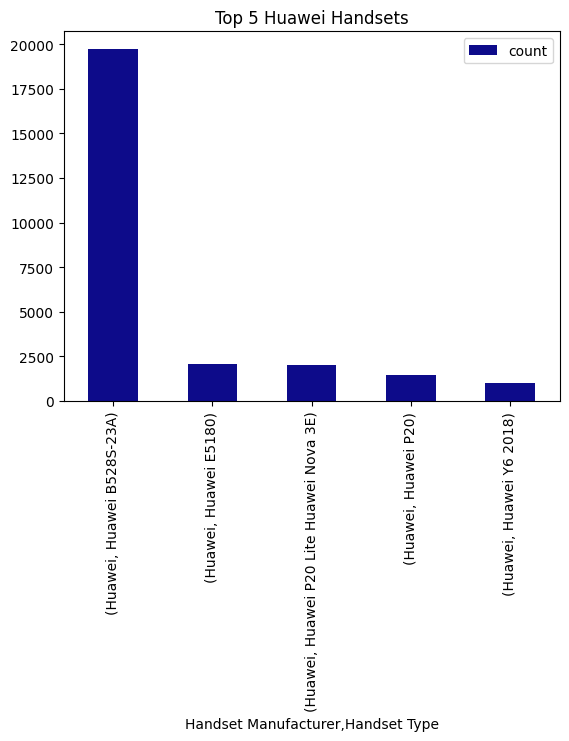

In [16]:
#Top huawei manufacturer handset
top_huawei = telecom.loc[telecom['Handset Manufacturer'] == 'Huawei']
top_huawei = top_huawei.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_huawei.columns = ['count']
top_huawei=top_huawei.nlargest(5, 'count')
top_huawei.plot.bar(y='count', title="Top 5 Huawei Handsets", stacked=True, color='#0d0b8a')
top_huawei

**Conclusion of the Analysis shows:**
- The most used handset model by customer is Huawei B528S-23A which is manufactured by Huawei
- The top 3 handset manufacturers first Apple total of 59339, second Samsung total of 40429, and third Huawei total of 34296
- Apple's Handset are not prefered by more customers and Samsung manufacturers also the same with apple's.
- Huawei Handsets manufacturers can be recommended to increase the manufacturing capability to increase there acces to customers.

In telecommunication, CDR or Call Detail Record is the voice channel and XDR is the data channel equivalent. So here, consider xDR as data sessions Detail Record. In xDR, user behavior can be tracked through the following applications:
Social Media, Google, Email, Youtube, Netflix, Gaming, Other .

#### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.
- Aggregate per user the following information in the column
    - number of xDR sessions
    - Session duration
    - the total download (DL) and upload (UL) data
    - the total data volume (in Bytes) during this session for each application
#### Non-Graphical Univariate Analysis and Graphical Univariate Analysis
**Number of xDR sessions**

In [17]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139602 entries, 0 to 148505
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       139602 non-null  float64
 1   Start                           139602 non-null  object 
 2   Start ms                        139602 non-null  float64
 3   End                             139602 non-null  object 
 4   End ms                          139602 non-null  float64
 5   Dur. (ms)                       139602 non-null  float64
 6   IMSI                            139602 non-null  float64
 7   MSISDN/Number                   139602 non-null  float64
 8   IMEI                            139602 non-null  float64
 9   Last Location Name              139602 non-null  object 
 10  Avg RTT DL (ms)                 139602 non-null  float64
 11  Avg RTT UL (ms)                 139602 non-null  float64
 12  Avg Bearer TP DL (kbp

In [18]:
data = DataFrame(telecom)

#### Agregation of total download and upload

In [19]:
# Aggregation of Total values
telecom["Total Uploads"]=telecom["Google UL (Bytes)"]+telecom["Email UL (Bytes)"]+telecom["Social Media UL (Bytes)"]+telecom["Youtube UL (Bytes)"]+telecom["Netflix UL (Bytes)"]+telecom["Gaming UL (Bytes)"]+telecom["Other UL (Bytes)"]
telecom["Total Downloads"]=telecom["Google DL (Bytes)"]+telecom["Email DL (Bytes)"]+telecom["Social Media DL (Bytes)"]+telecom["Youtube DL (Bytes)"]+telecom["Netflix DL (Bytes)"]+telecom["Gaming DL (Bytes)"]+telecom["Other DL (Bytes)"]
telecom['Total UL and DL']=telecom['Total DL (Bytes)']+telecom["Total UL (Bytes)"]

In [20]:
avg_time_per_user = telecom.groupby('MSISDN/Number').agg({'Dur. (ms).1': 'mean'})
avg_time_per_user.rename(columns={'Dur. (ms).1': 'Average session duration (ms)'}, inplace=True)
avg_time_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

Average session duration (ms)
MSISDN/Number                                
33669260221.00                  1573420996.00
33661715300.00                  1480875272.00
33607498825.00                  1474663399.00
33762601828.00                  1375612670.00
33760627129.00                  1361762651.00
33761667219.00                  1357643593.00
33666816945.00                  1299381954.00
33698695185.00                  1209607515.25
33630495793.00                  1177517468.00
33666983844.00                  1113063733.00

#### Uni-variate Abalysis

In [21]:
telecom["Dur. (ms).1"].describe()

count       139602.00
mean     103646756.75
std       79237066.06
min        7142988.00
25%       57644063.25
50%       86399979.00
75%      130420077.00
max     1859336442.00
Name: Dur. (ms).1, dtype: float64

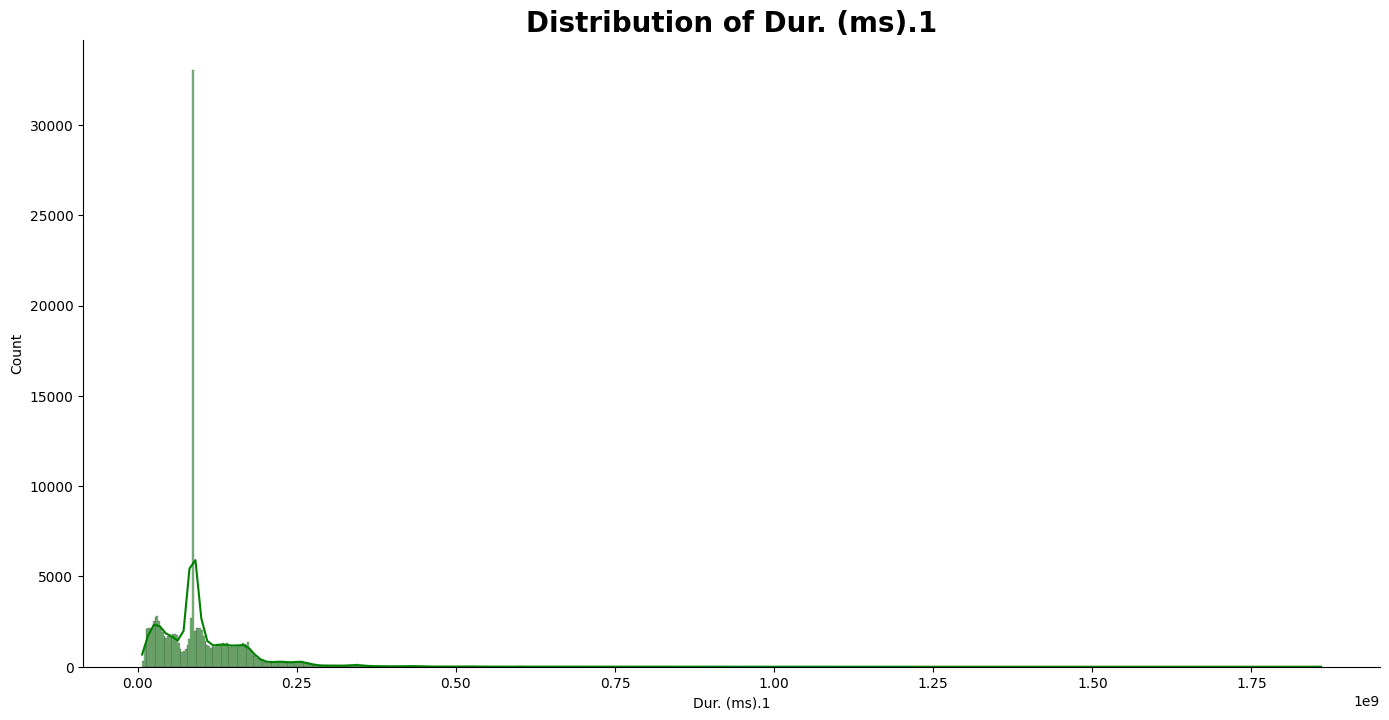

In [22]:
plot_hist(telecom, "Dur. (ms).1", "green")

In [23]:
telecom["Total UL (Bytes)"].describe()

count     139602.00
mean    41117163.86
std     11287323.17
min      2866892.00
25%     33210870.25
50%     41134852.50
75%     49027334.75
max     78331311.00
Name: Total UL (Bytes), dtype: float64

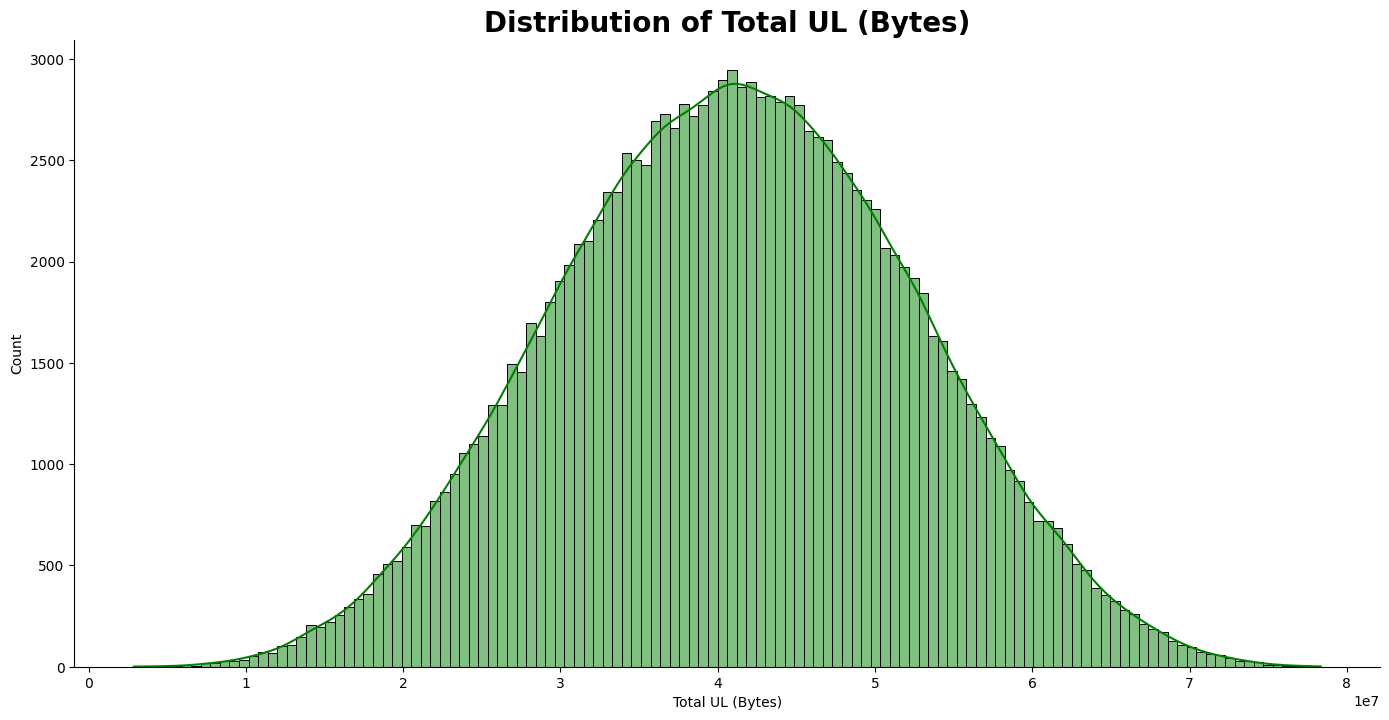

In [24]:
plot_hist(telecom, "Total UL (Bytes)", "green" )

In [25]:
telecom["Total DL (Bytes)"].describe()

count      139602.00
mean    454359184.87
std     244224723.80
min       7114041.00
25%     242718222.00
50%     455266232.00
75%     665566575.50
max     902969616.00
Name: Total DL (Bytes), dtype: float64

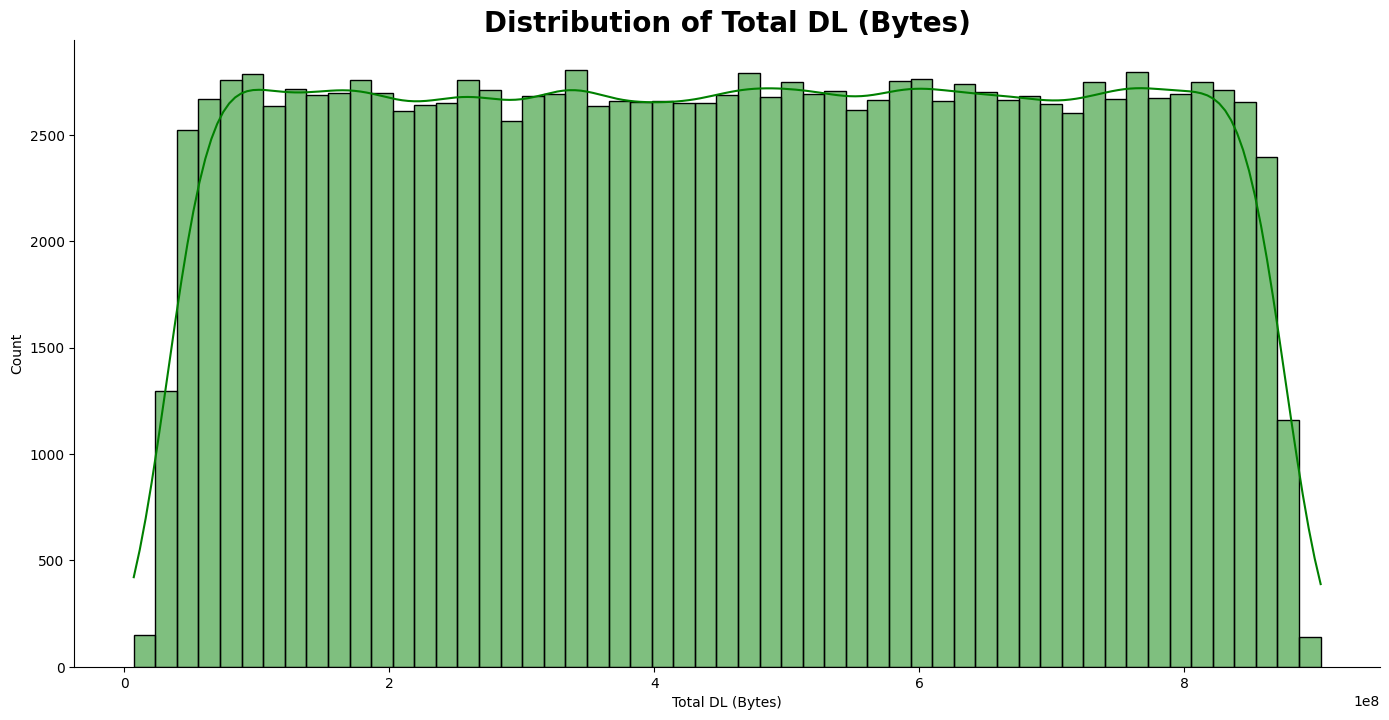

In [26]:
plot_hist(telecom, "Total DL (Bytes)", "green")

In [27]:
telecom["Total Downloads"].describe()

count       139602.00
mean     875738186.73
std      344188385.08
min       15169479.00
25%      628962845.75
50%      876230192.50
75%     1123553720.75
max     1735682869.00
Name: Total Downloads, dtype: float64

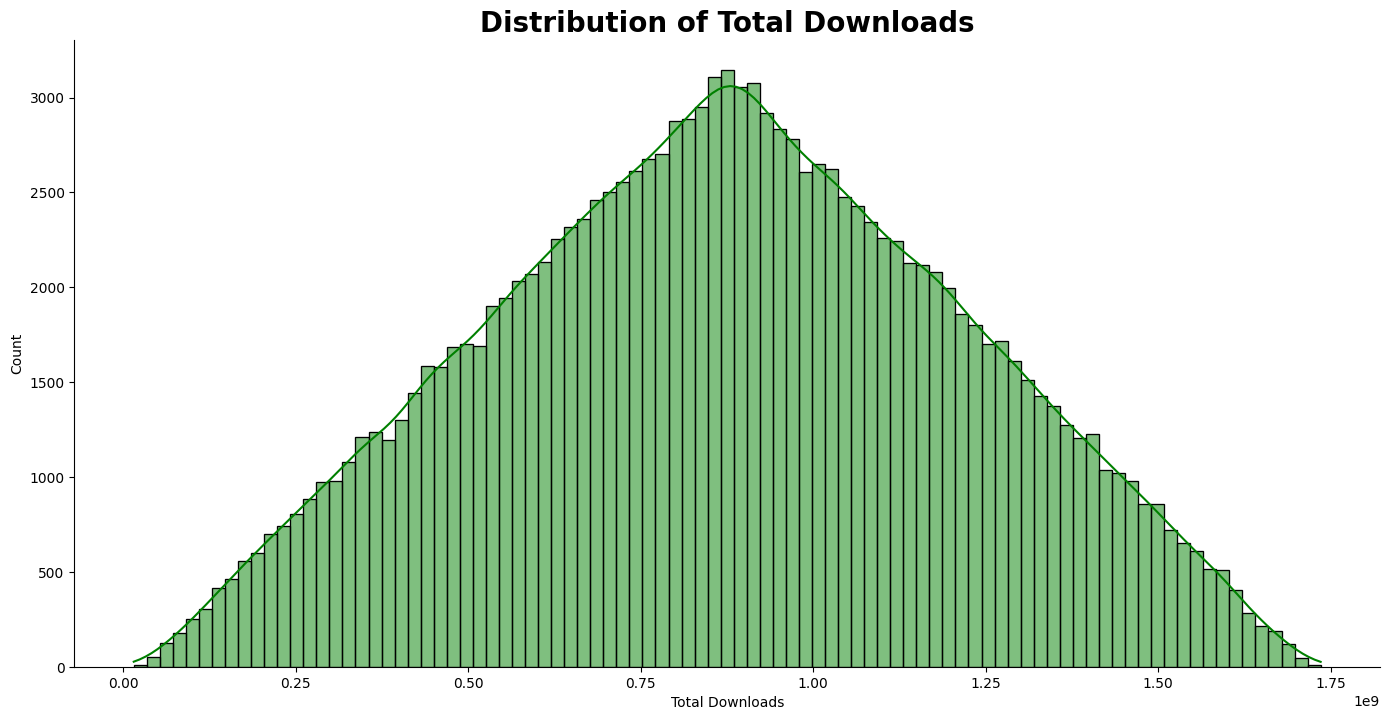

In [28]:
plot_hist(telecom,"Total Downloads","green")

#### Aggregation of Total Social Media data

In [29]:
# Aggregation of Total Social Media data
telecom["Youtube_Total_Data"]=telecom["Youtube DL (Bytes)"]+telecom["Youtube UL (Bytes)"]
telecom["Google_Total_Data"]=telecom["Google DL (Bytes)"]+telecom["Google UL (Bytes)"]
telecom["Email_Total_Data"]=telecom["Email DL (Bytes)"]+telecom["Email UL (Bytes)"]
telecom["Social_Media_Total_Data"]=telecom["Social Media DL (Bytes)"]+telecom["Social Media UL (Bytes)"]
telecom["Netflix_Total_Data"]=telecom["Netflix DL (Bytes)"]+telecom["Netflix UL (Bytes)"]
telecom["Gaming_Total_Data"]=telecom["Gaming DL (Bytes)"]+telecom["Gaming UL (Bytes)"]
telecom["Other_Total_Data"]=telecom["Other DL (Bytes)"]+telecom["Other UL (Bytes)"]

##### Total Up-Load and Down-Load volumne of Mega Bytes each application per user

In [30]:
total_user = telecom.groupby('MSISDN/Number')[[ 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']].sum()
total_user.nlargest(10, 'Total UL and DL')

Youtube_Total_Data  Google_Total_Data  Email_Total_Data  \
MSISDN/Number                                                             
33614892860.00        394370218.00       127973787.00       40788634.00   
33760536639.00        396289198.00       123223099.00       33693767.00   
33625779332.00        452958769.00       142307915.00       40633966.00   
33626320676.00        374483047.00       152191852.00       42418782.00   
33675877202.00        317410572.00       109860502.00       31514421.00   
33659725664.00        257991088.00       116516345.00       35999792.00   
33666464084.00        227336012.00        89320737.00       25557139.00   
33664712899.00        276834013.00        90389372.00       21426007.00   
33698792269.00        302661958.00        79736125.00       29059042.00   
33658361927.00        260989846.00        76507138.00       19682048.00   

                Social_Media_Total_Data  Netflix_Total_Data  \
MSISDN/Number                                                 
33614892860.00              28294544.00        361401046.00   
33760536639.00              39783189.00        334643269.00   
33625779332.00              27135500.00        356980607.00   
33626320676.00              43374779.00        328725740.00   
33675877202.00              19222921.00        309093159.00   
33659725664.00              35412358.00        399519079.00   
33666464084.00              18629986.00        214416926.00   
33664712899.00              19390599.00        251798809.00   
33698792269.00              15728161.00        268247480.00   
33658361927.00              17285759.00        264142078.00   

                Gaming_Total_Data  Other_Total_Data  Total UL and DL  
MSISDN/Number                                                         
33614892860.00      7749432234.00     7639263572.00    8846226494.00  
33760536639.00      7461045228.00     4716134493.00    8514773963.00  
33625779332.00      7326673487.00     6354583086.00    8499620722.00  
33626320676.00      6887572116.00     8167877776.00    7971167261.00  
33675877202.00      6970567597.00     6798515150.00    7891110608.00  
33659725664.00      6725559211.00     6317415487.00    7705862783.00  
33666464084.00      6646303338.00     4349141478.00    7308500938.00  
33664712899.00      6103856008.00     3976960308.00    6872018208.00  
33698792269.00      5753743069.00     4689876286.00    6540899126.00  
33658361927.00      5705919641.00     5013650844.00    6452397856.00

<Axes: ylabel='Google_Total_Data'>

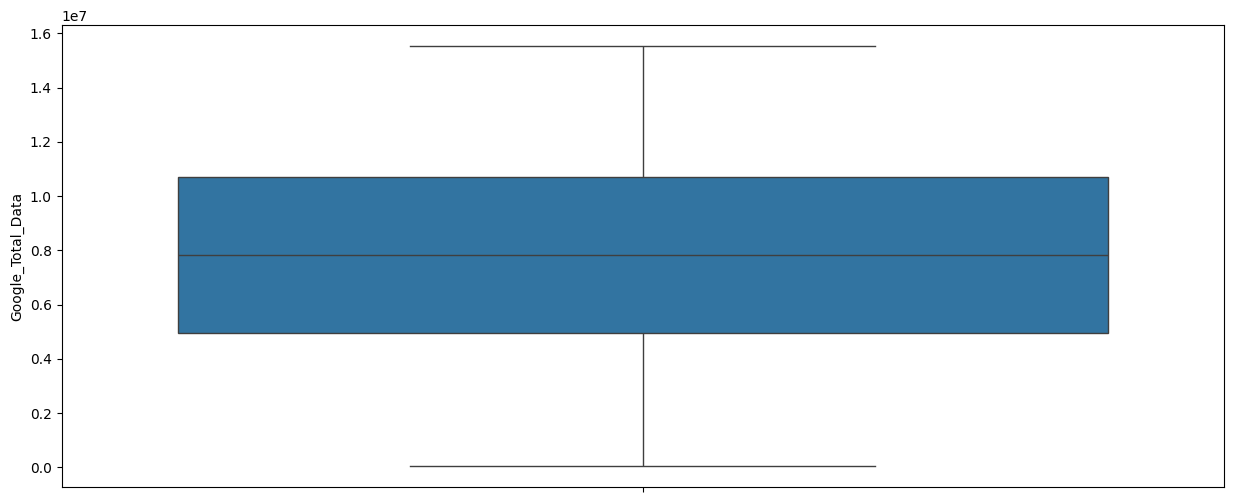

In [31]:
plt.figure(figsize=(15, 6))
sns.boxplot(telecom['Google_Total_Data'])

c:\Python312\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Python312\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


Text(0.5, 1.0, 'Violin and strip plot of Dur (ms) Distribution')

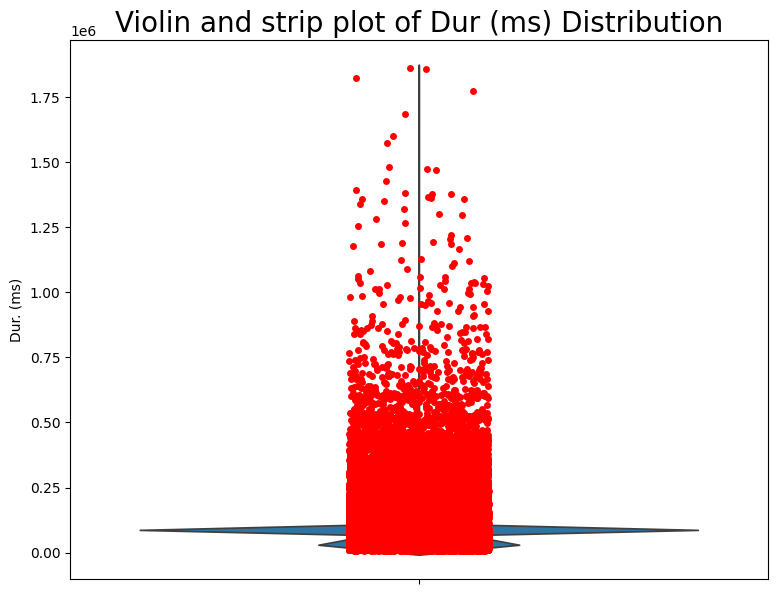

In [32]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=telecom, y='Dur. (ms)', orient='hor', color='red')
sns.violinplot(data=telecom, y='Dur. (ms)', orient='hor')
plt.title('Violin and strip plot of Dur (ms) Distribution', size=20)

##### Social Media Total Upload and Download Data

In [33]:
telecom["Social_Media_Total_Data"].describe()

count    139602.00
mean    1828354.98
std     1035594.99
min        1563.00
25%      932100.50
50%     1827457.00
75%     2726630.50
max     3650240.00
Name: Social_Media_Total_Data, dtype: float64

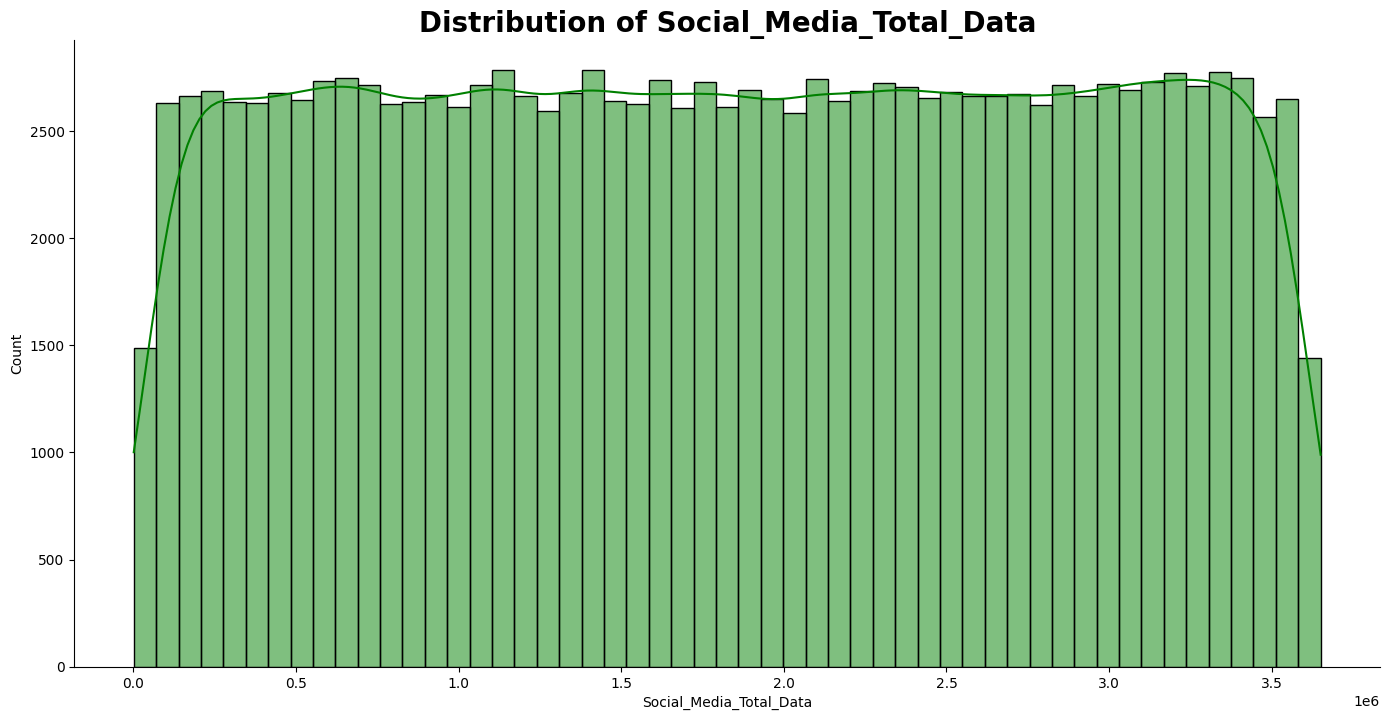

In [34]:
plot_hist(telecom, 'Social_Media_Total_Data', 'green')

**Data for each social media**

       Youtube_Total_Data
count           139602.00
mean          22642191.85
std            9250917.85
min              78903.00
25%           15985514.25
50%           22665982.50
75%           29304266.00
max           45190078.00


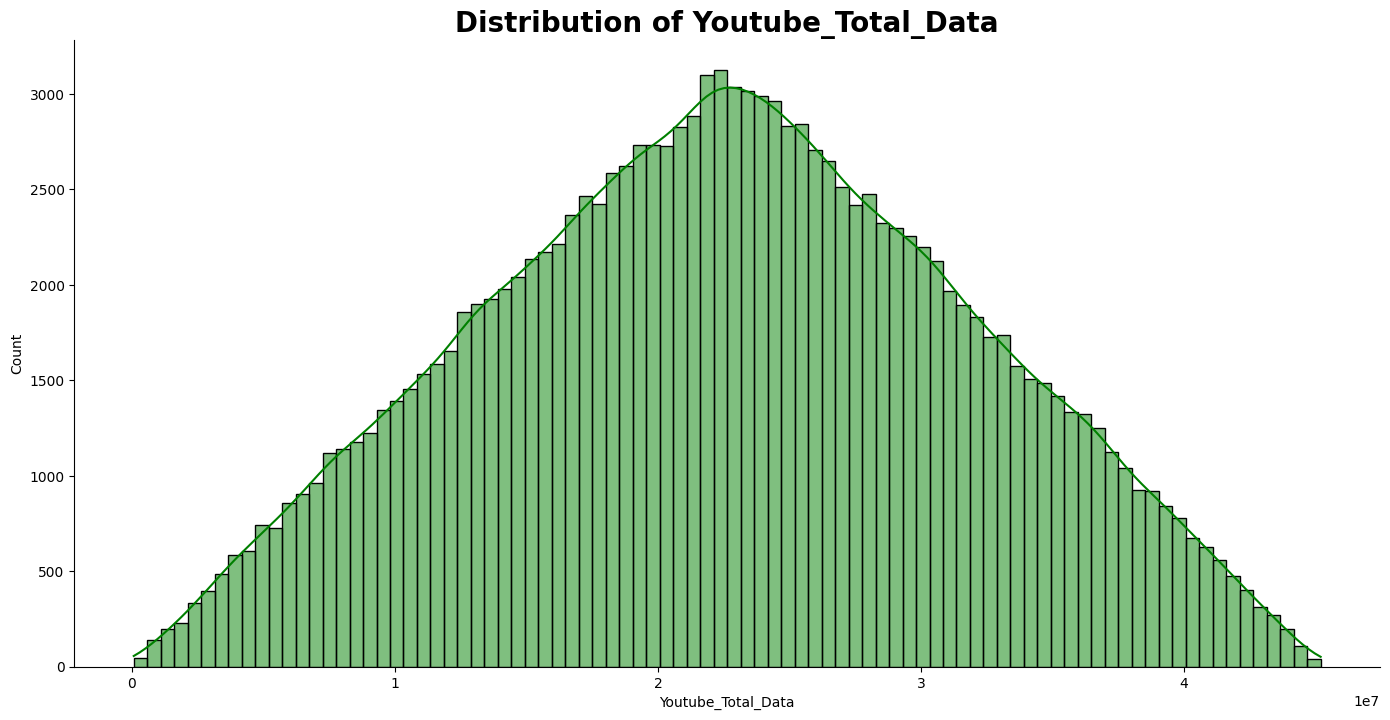

       Google_Total_Data
count          139602.00
mean          7807996.98
std           3517491.36
min             40330.00
25%           4941258.75
50%           7817054.00
75%          10685318.25
max          15528782.00


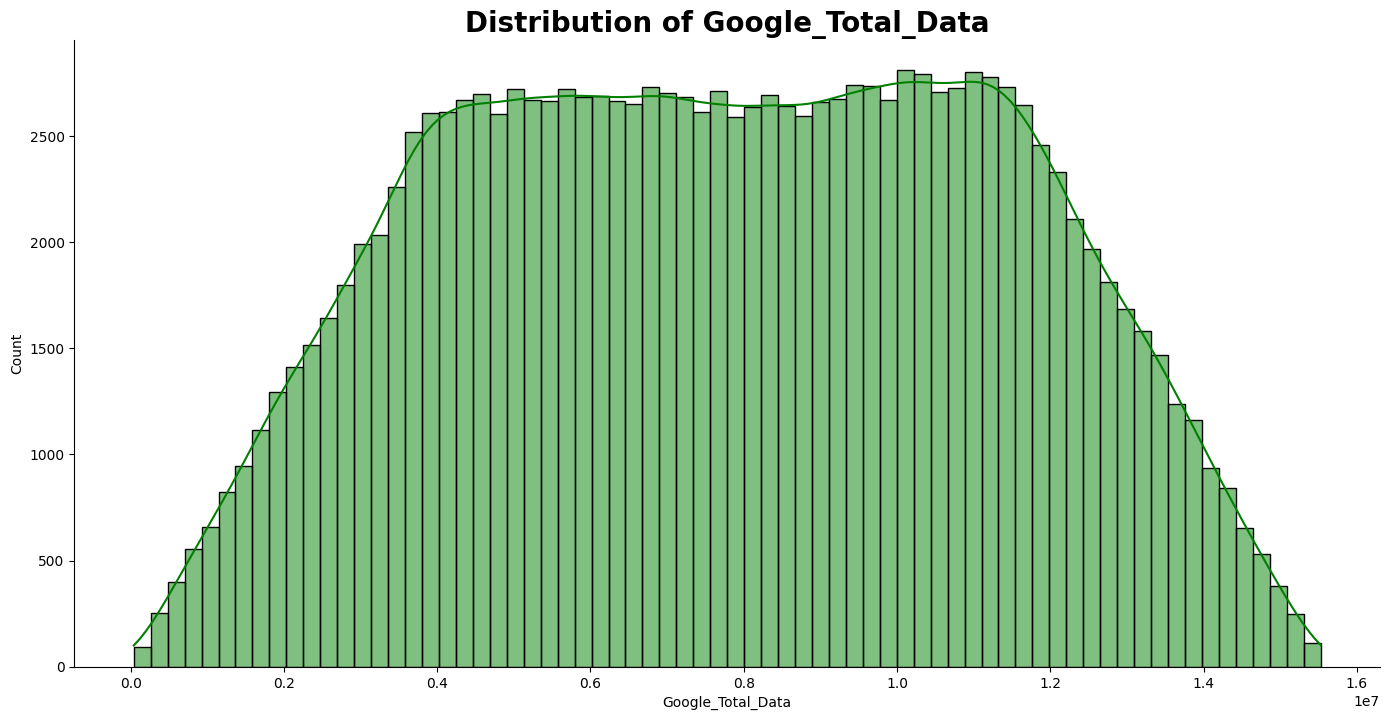

       Email_Total_Data
count         139602.00
mean         2258584.44
std          1070874.28
min             8359.00
25%          1358998.00
50%          2263357.50
75%          3159206.25
max          4518036.00


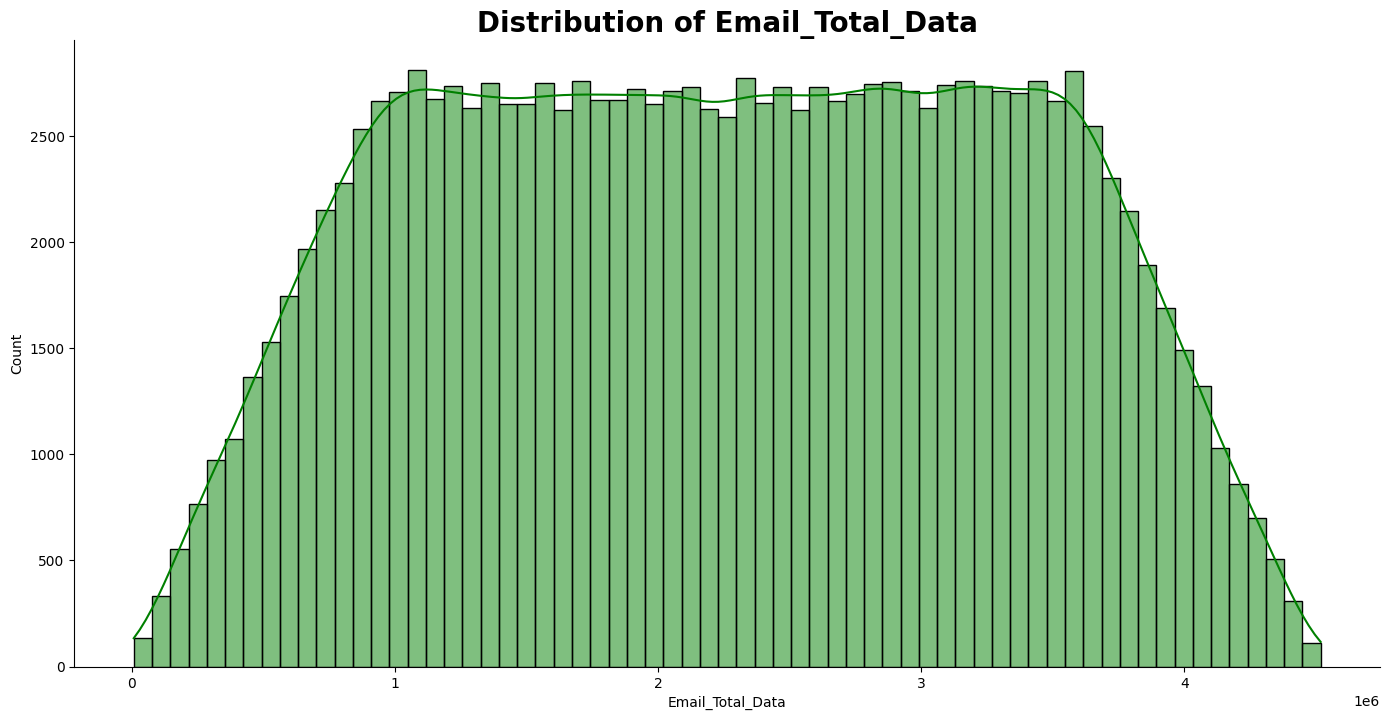

       Social_Media_Total_Data
count                139602.00
mean                1828354.98
std                 1035594.99
min                    1563.00
25%                  932100.50
50%                 1827457.00
75%                 2726630.50
max                 3650240.00


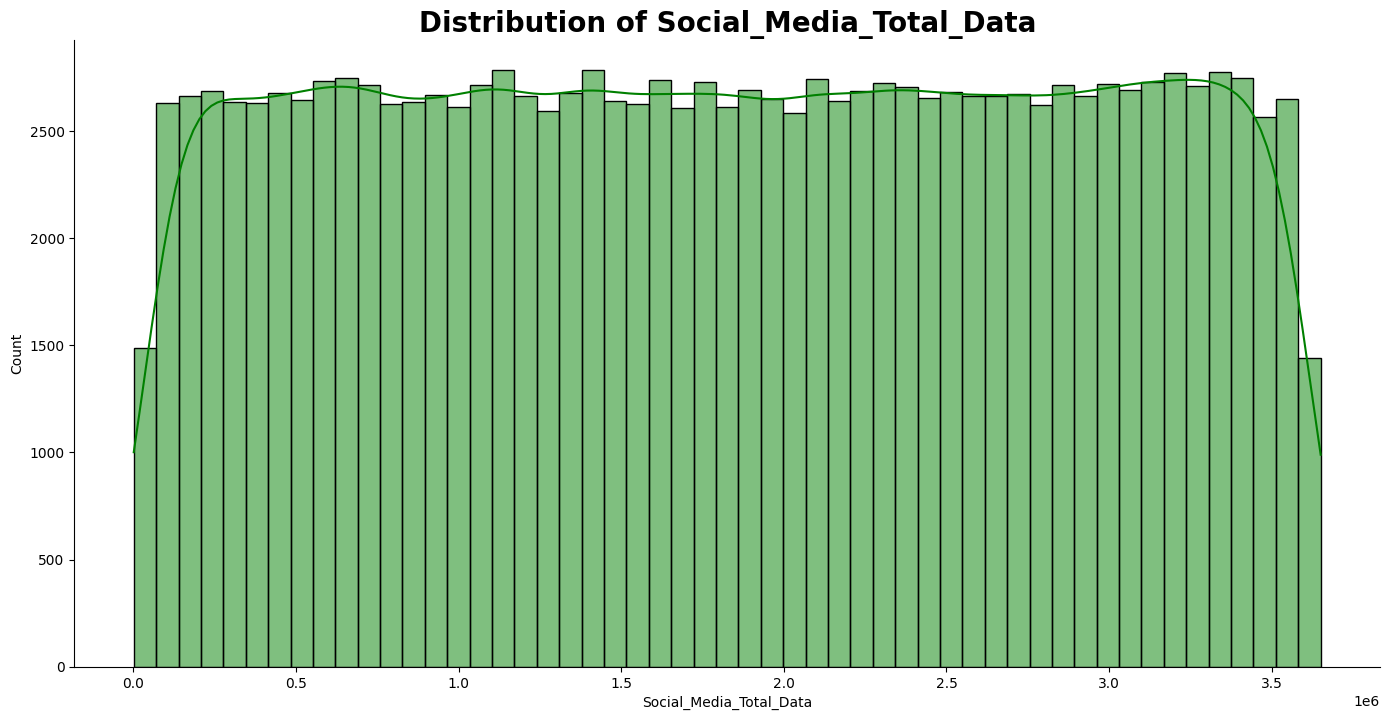

       Netflix_Total_Data
count           139602.00
mean          22627652.11
std            9253973.92
min              98432.00
25%           15981718.25
50%           22636204.50
75%           29270921.50
max           45198153.00


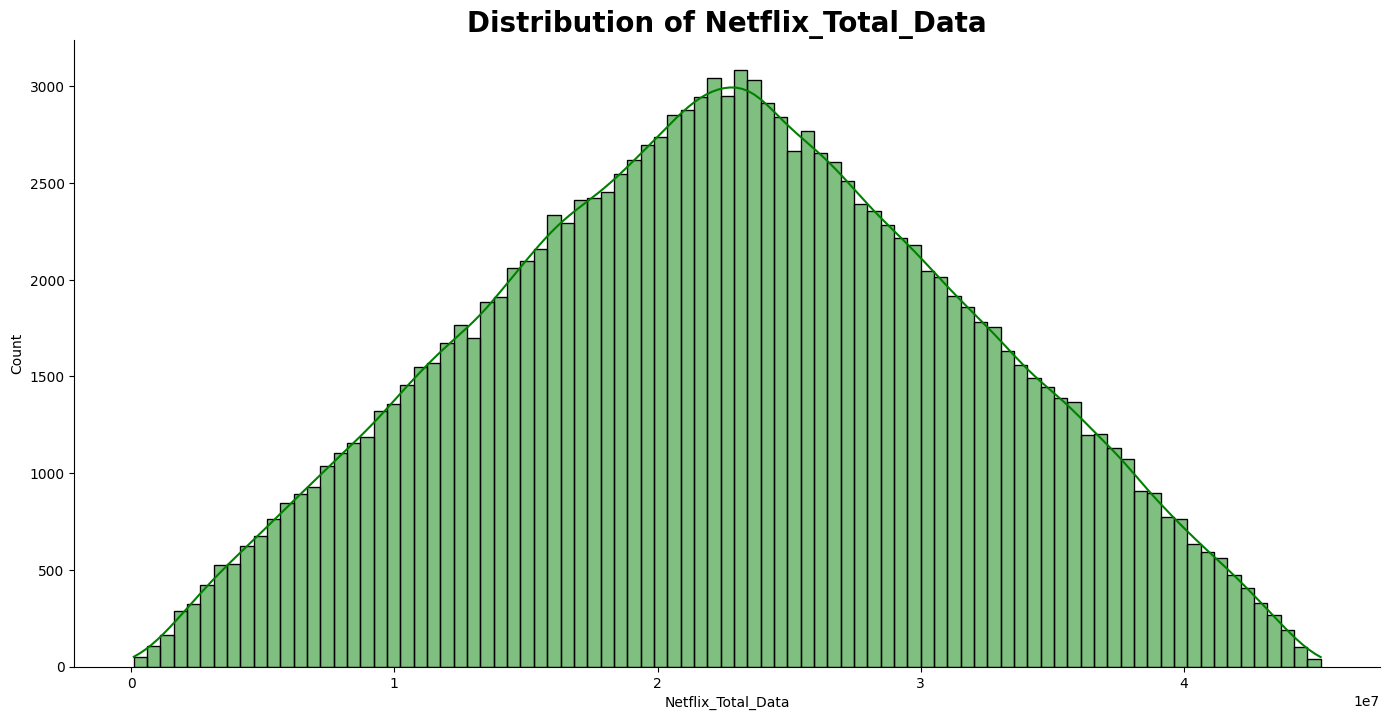

       Gaming_Total_Data
count          139602.00
mean        430047953.46
std         244098145.85
min            306358.00
25%         218351888.75
50%         431110072.50
75%         641339405.25
max         859202784.00


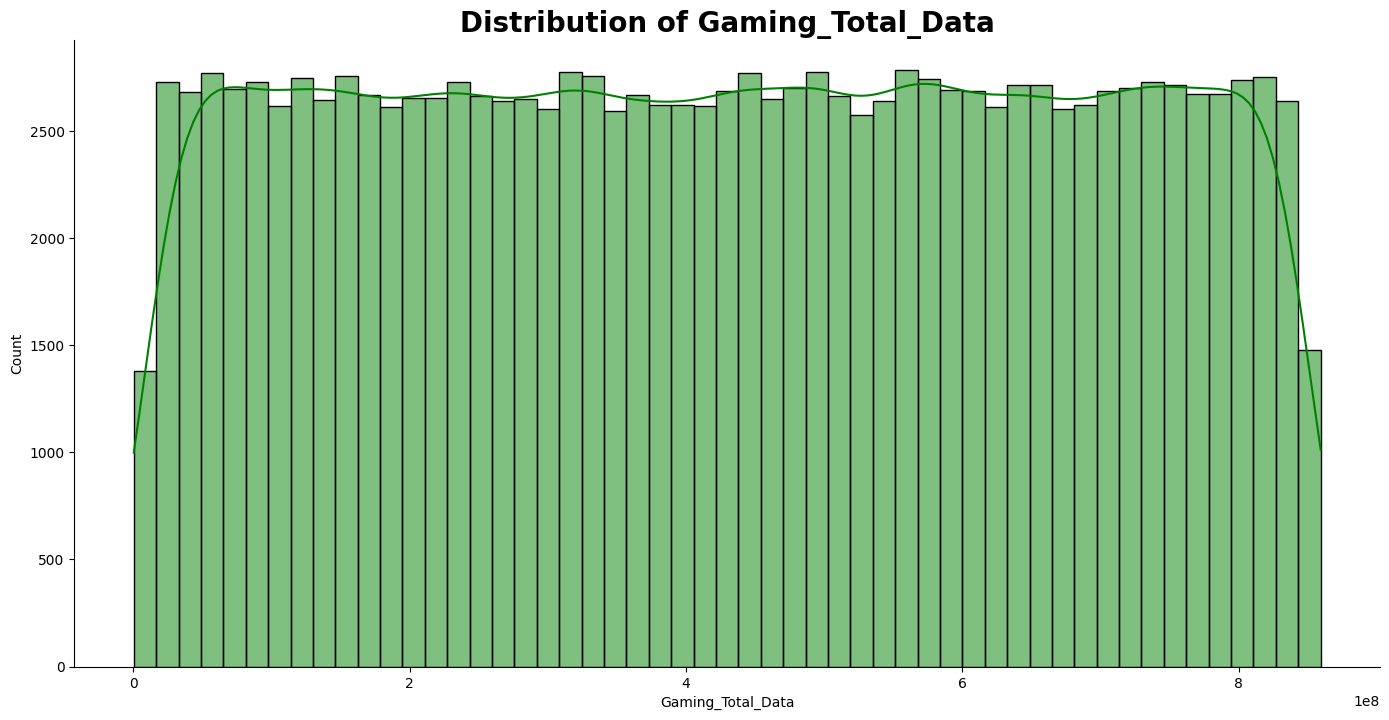

       Other_Total_Data
count         139602.00
mean       429642616.78
std        243269139.54
min           149045.00
25%        218996706.75
50%        430348436.00
75%        640369245.25
max        859520934.00


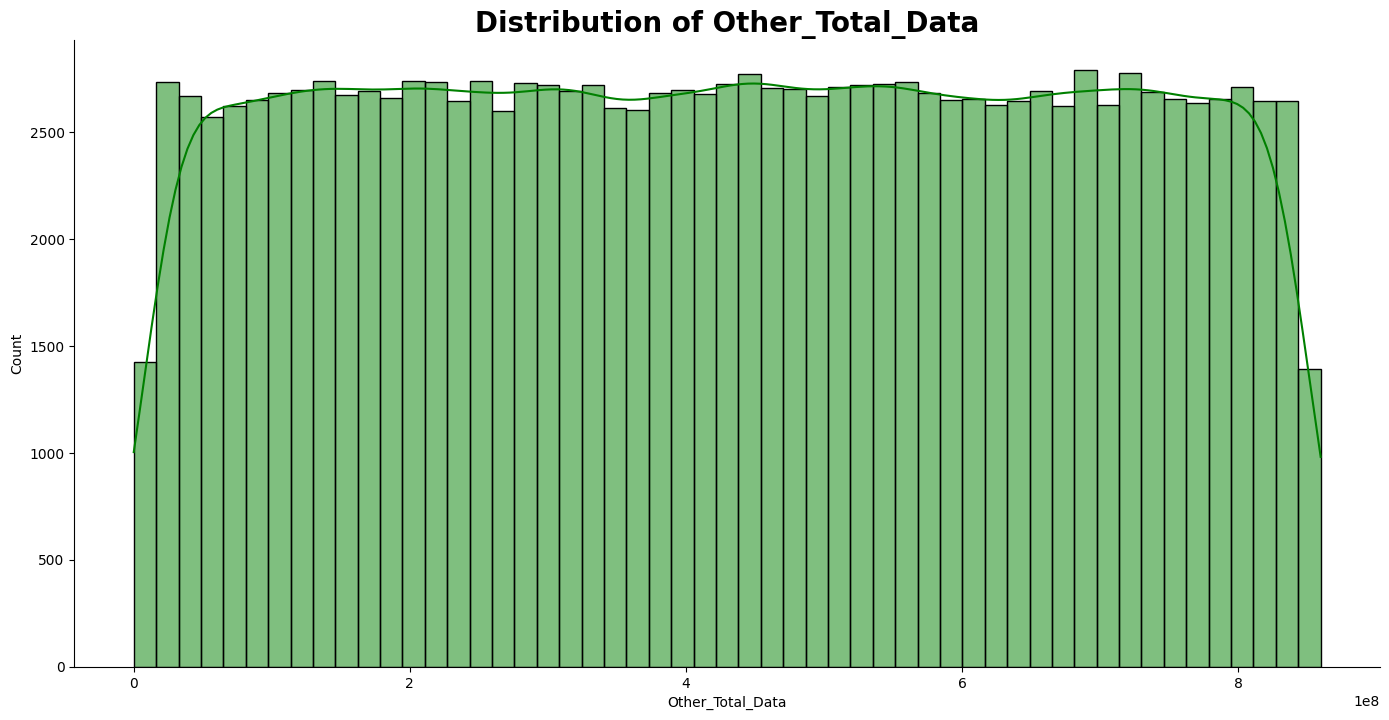

In [35]:
social_media = [ 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data']
for col in social_media:
    print(telecom[[col]].describe())
    plot_hist(telecom, col, "green")

**Total Aggregate of Time**

In [36]:
# Time aggregates
telecom['Start ms']=telecom['Start ms']
telecom['End ms']=telecom['End ms']
telecom['Start']=telecom['Start']
telecom['End']=telecom['End']
telecom['Avg Delay (ms)']=telecom['Avg RTT UL (ms)']+telecom['Avg RTT DL (ms)']
telecom['Dur. (ms)']=telecom['Dur. (ms)']
telecom['Dur. (ms).1']=telecom['Dur. (ms).1']
telecom["Activity_Duration(ms)"]=telecom['Activity Duration UL (ms)']+telecom['Activity Duration DL (ms)']

In [37]:
telecom.head()

Bearer Id                Start  Start ms                  End  \
0 13114483460844900352.00  2019-04-04 12:01:00    770.00  2019-04-25 14:35:00   
1 13114483482878900224.00  2019-04-09 13:04:00    235.00  2019-04-25 08:15:00   
2 13114483484080500736.00  2019-04-09 17:42:00      1.00  2019-04-25 11:58:00   
4 13114483499480700928.00  2019-04-12 20:10:00    565.00  2019-04-25 10:40:00   
6 13114483501243799552.00  2019-04-13 08:41:00    612.00  2019-04-25 08:16:00   

   End ms  Dur. (ms)               IMSI  MSISDN/Number              IMEI  \
0  662.00 1823652.00 208201448079117.00 33664962239.00 35521209507511.00   
1  606.00 1365104.00 208201909211140.00 33681854413.00 35794009006359.00   
2  652.00 1361762.00 208200314458056.00 33760627129.00 35281510359387.00   
4  954.00 1089009.00 208201401415120.00 33699795932.00 35407009745539.00   
6  168.00 1035261.00 208201448341047.00 33665368271.00 86762704322800.00   

      Last Location Name  ...  Total UL and DL  Youtube_Total_Data  \
0  9.16456699548519E+015  ...     345629377.00         18355943.00   
1                L77566A  ...     707185356.00         39359124.00   
2                D42335A  ...     307690973.00         34425237.00   
4                D88865A  ...     607681403.00         34222253.00   
6  9.16456701058919E+015  ...     118487293.00          9120760.00   

   Google_Total_Data  Email_Total_Data  Social_Media_Total_Data  \
0         2905912.00        3701304.00               1570185.00   
1         4414096.00         937385.00               1933278.00   
2        10229119.00        3363124.00               1726277.00   
4         7748843.00        2110349.00                912788.00   
6         4906872.00        2090979.00               1624991.00   

   Netflix_Total_Data  Gaming_Total_Data  Other_Total_Data  Avg Delay (ms)  \
0         17855187.00       292426453.00      180558843.00           47.00   
1         35565545.00       609920783.00      541959383.00           70.00   
2         23751202.00       229980251.00      414908351.00          123.83   
4         17539799.00       531237049.00      564619822.00          123.83   
6         31212766.00        58881157.00      814303325.00          107.00   

   Activity_Duration(ms)  
0               76411.00  
1                3728.00  
2                   0.00  
4                   0.00  
6              325995.00  

[5 rows x 57 columns]

**Agregate Categorical variable**

In [38]:
# categorical Variables
telecom['Handset Manufacturer']=telecom['Handset Manufacturer']
telecom['Handset Type']=telecom['Handset Type']
telecom['Last Location Name']=telecom['Last Location Name']
telecom['IMSI']=telecom['IMSI']
telecom['IMEI']=telecom['IMEI']

In [39]:
data = Pre_Process(telecom)

In [40]:
# Convert to MB

telecom["Youtube_Total_Data"] = data.convertBytesToMegabytes(telecom["Youtube_Total_Data"])
telecom["Google_Total_Data"] = data.convertBytesToMegabytes(telecom["Google_Total_Data"])
telecom['Email_Total_Data'] = data.convertBytesToMegabytes(telecom["Email_Total_Data"])
telecom['Social_Media_Total_Data'] = data.convertBytesToMegabytes(telecom["Social_Media_Total_Data"])
telecom["Netflix_Total_Data"] = data.convertBytesToMegabytes(telecom["Netflix_Total_Data"])
telecom['Gaming_Total_Data'] = data.convertBytesToMegabytes(telecom["Gaming_Total_Data"])
telecom['Other_Total_Data'] = data.convertBytesToMegabytes(telecom["Other_Total_Data"])
telecom['Total UL and DL'] = data.convertBytesToMegabytes(telecom["Total UL and DL"]) 

**Bivariate Analysis – explore the relationship between each application & the total DL+UL**

In [41]:
columns = ['MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']


In [42]:
user_ratio_usage= telecom[columns].groupby('MSISDN/Number').sum()
user_ratio_usage.head(10)

Youtube_Total_Data  Google_Total_Data  Email_Total_Data  \
MSISDN/Number                                                             
33601001722.00               21.62               4.39              1.33   
33601001754.00               12.43               5.33              3.31   
33601007832.00                6.98               9.68              2.28   
33601008617.00               41.53              18.50              3.31   
33601010682.00               34.35              15.26              7.85   
33601011634.00               26.43              10.20              1.36   
33601011959.00               18.89              12.02              2.22   
33601020306.00               28.57              12.94              2.78   
33601021217.00                2.71              11.00              3.14   
33601022743.00               31.19               7.62              1.90   

                Social_Media_Total_Data  Netflix_Total_Data  \
MSISDN/Number                                                 
33601001722.00                     2.23               27.18   
33601001754.00                     2.66               11.22   
33601007832.00                     0.28                1.94   
33601008617.00                     2.91               49.20   
33601010682.00                     3.79               30.32   
33601011634.00                     2.77               45.81   
33601011959.00                     1.78               15.29   
33601020306.00                     0.96               35.53   
33601021217.00                     1.23               21.06   
33601022743.00                     3.33               34.15   

                Gaming_Total_Data  Other_Total_Data  Total UL and DL  
MSISDN/Number                                                         
33601001722.00             812.46            386.57           878.69  
33601001754.00             119.75            281.71           156.86  
33601007832.00             391.13             35.28           422.32  
33601008617.00            1314.80            804.80          1457.41  
33601010682.00             511.64            492.37           615.22  
33601011634.00             548.46            224.89           654.72  
33601011959.00             282.36            178.20           332.66  
33601020306.00             647.10            138.34           732.46  
33601021217.00             578.11            607.88           630.09  
33601022743.00             401.56            520.58           482.42

In [43]:
apps_columns = ['Dur. (ms)','MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']


In [44]:
user_ratio_usage = telecom[apps_columns]
user_ratio_usage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139602 entries, 0 to 148505
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Dur. (ms)                139602 non-null  float64
 1   MSISDN/Number            139602 non-null  float64
 2   Youtube_Total_Data       139602 non-null  float64
 3   Google_Total_Data        139602 non-null  float64
 4   Email_Total_Data         139602 non-null  float64
 5   Social_Media_Total_Data  139602 non-null  float64
 6   Netflix_Total_Data       139602 non-null  float64
 7   Gaming_Total_Data        139602 non-null  float64
 8   Other_Total_Data         139602 non-null  float64
 9   Total UL and DL          139602 non-null  float64
dtypes: float64(10)
memory usage: 11.7 MB


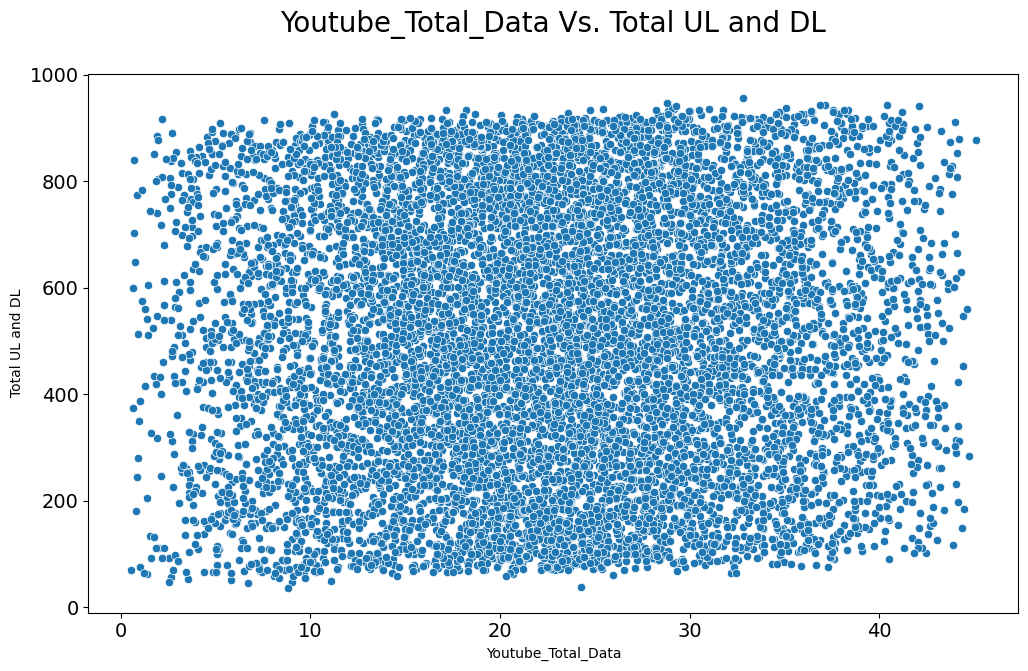

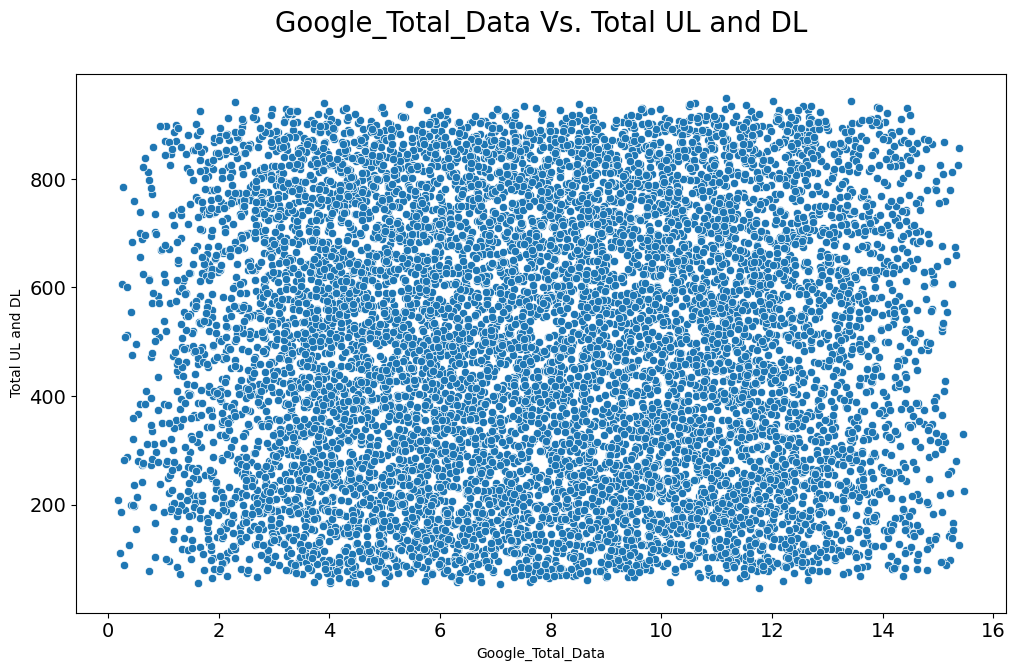

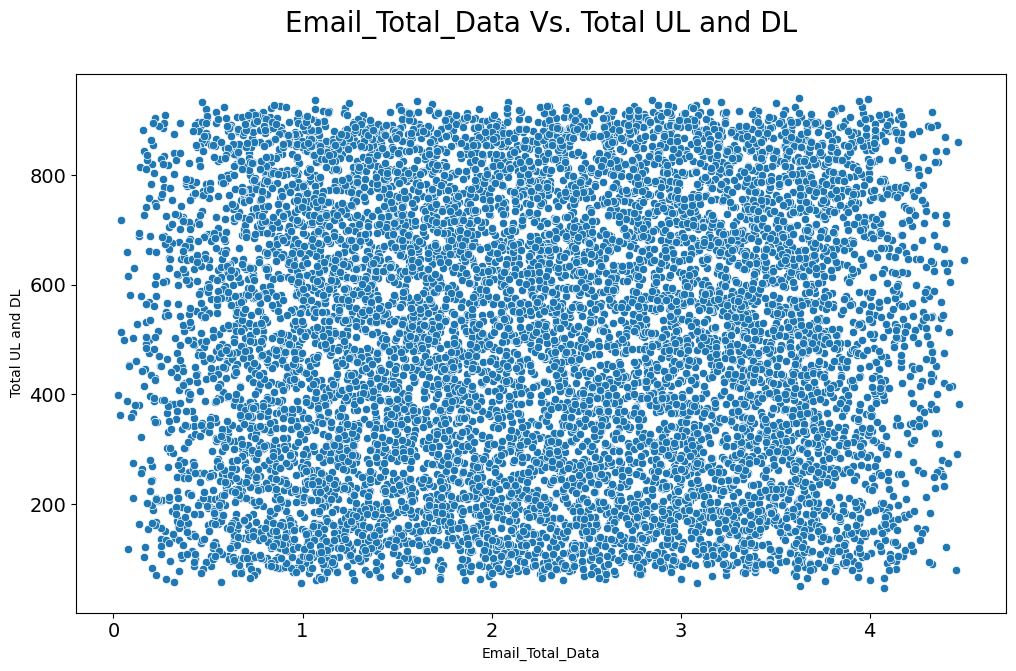

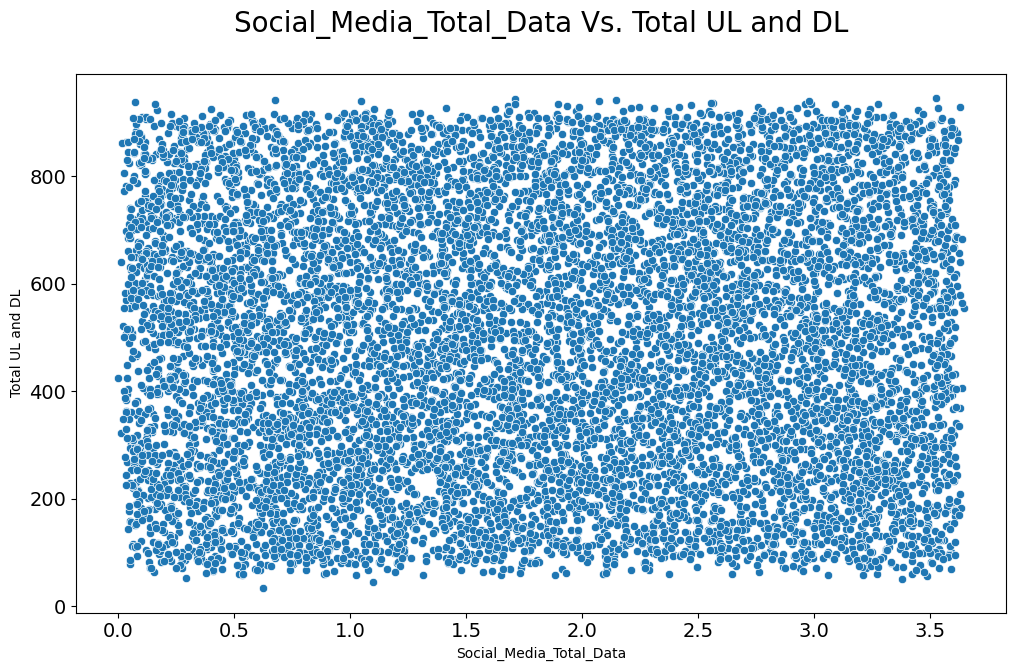

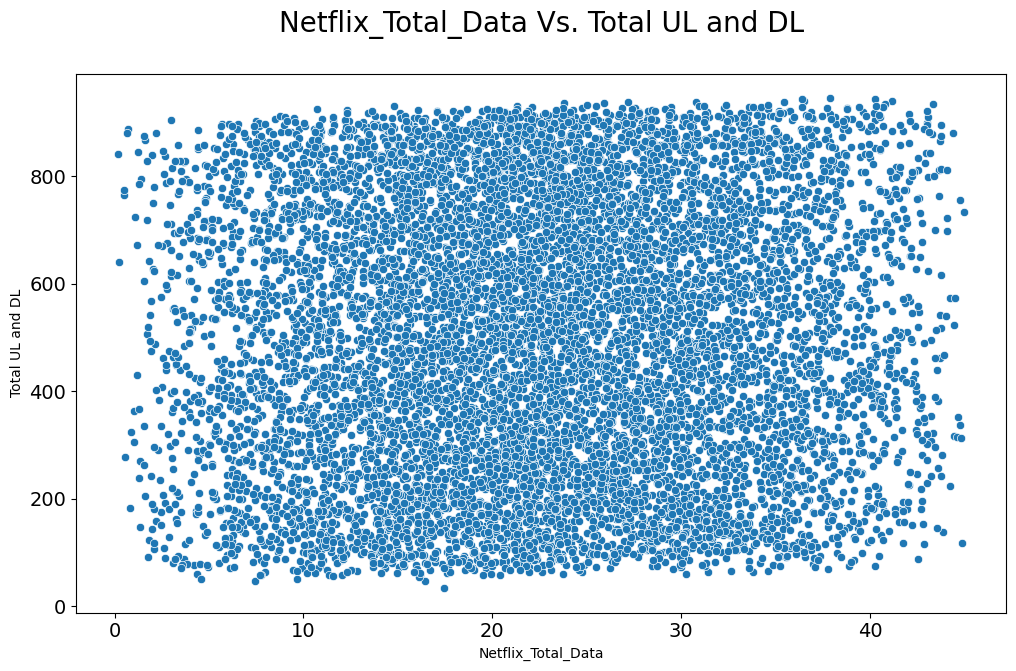

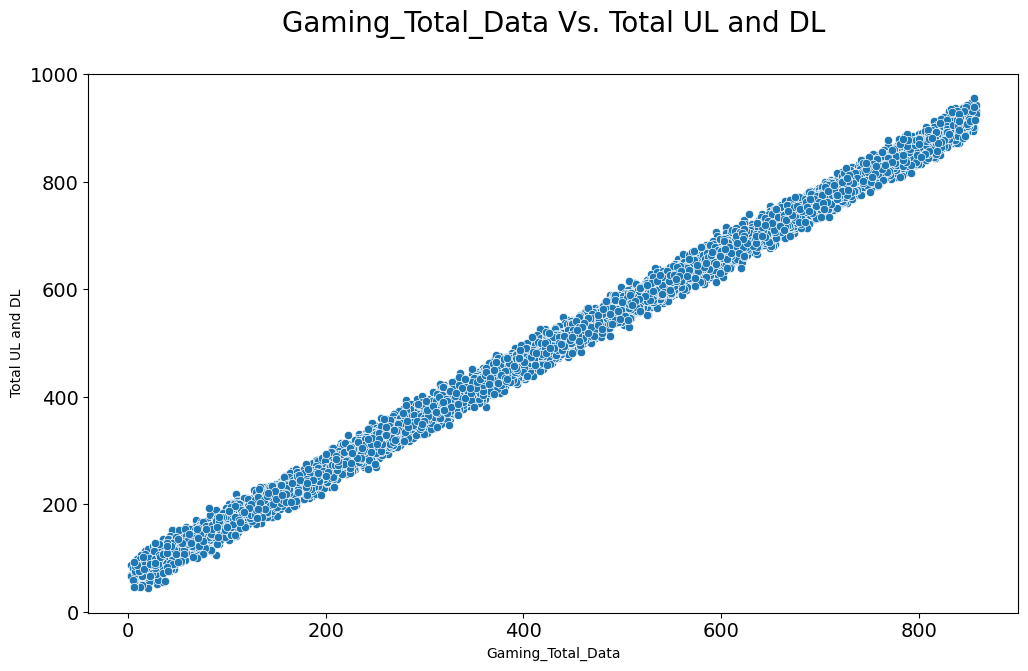

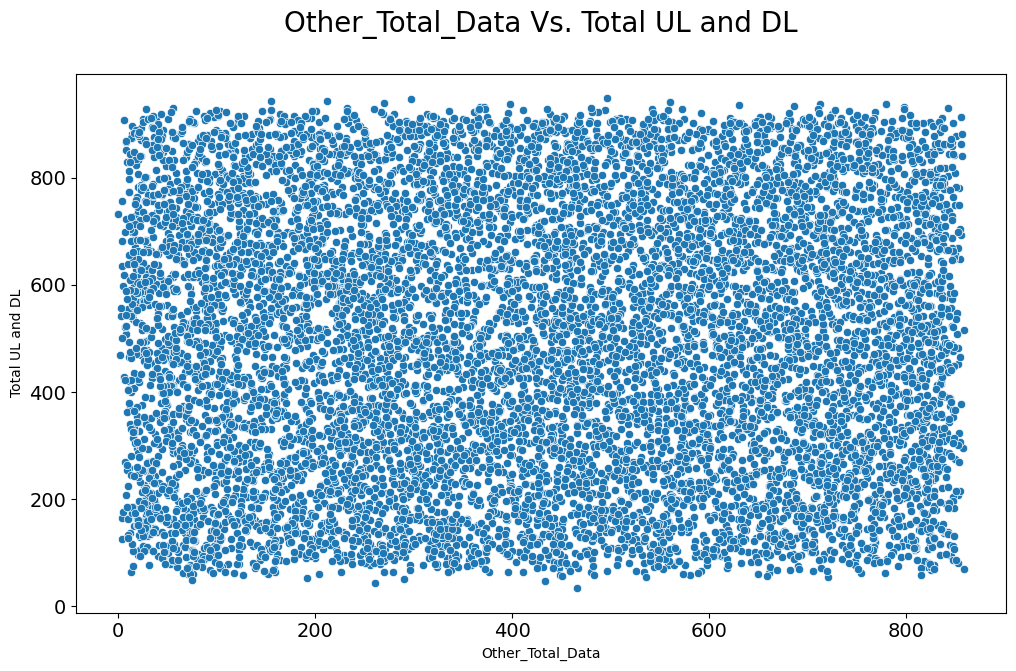

In [45]:
social_media = [ 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data']
for col in social_media:
    plot_scatter(user_ratio_usage.sample(10000), col, 'Total UL and DL')

**Variable transformations**

- total duration for all sessions and compute the total data (DL+UL) per decile class.

In [46]:
# Step 1: Create and scale the dataframe
scaled_df = user_ratio_usage[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)']].copy()
scaled_df['Duration'] = user_ratio_usage['Dur. (ms)'] / 1000

# Step 2: Group by 'MSISDN/Number' and aggregate
scaled_df = scaled_df.groupby('MSISDN/Number').agg({'Duration': 'sum', 'Total UL and DL': 'sum'})

# Step 3: Create deciles
deciles = pd.qcut(scaled_df['Duration'], 5, labels=["1st_decile", "2nd_decile", "3rd_decile", "4th_decile", "5th_decile"])

# Step 4: Add deciles to a new dataframe
explore_feature_df_with_decile = scaled_df.copy()
explore_feature_df_with_decile['Decile'] = deciles

# Step 5: Group by deciles and aggregate
explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('Decile').agg({
    'Total UL and DL': 'sum',
    'Duration': 'sum'
})

# Output the result
explore_feature_df_with_decile_agg


Total UL and DL   Duration
Decile                                
1st_decile      10790934.76  600277.31
2nd_decile      12064915.77 1736346.70
3rd_decile      10503158.74 1910912.03
4th_decile      13047051.91 3200048.36
5th_decile      22763428.05 7021633.69

<Figure size 1000x700 with 0 Axes>

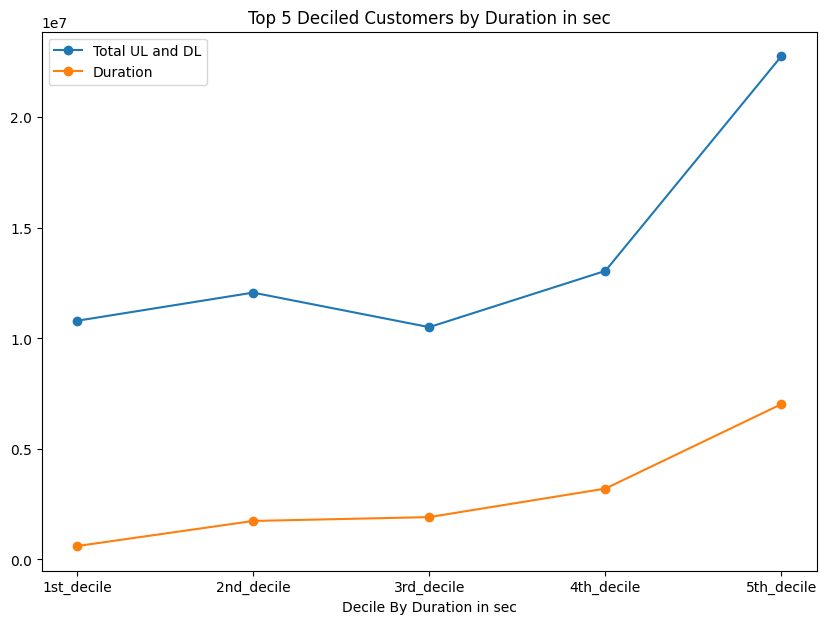

In [47]:
plt.figure(figsize=(10,7))
explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 Deciled Customers by Duration in sec').set_xlabel("Decile By Duration in sec")
plt.xticks(np.arange(len(explore_feature_df_with_decile_agg.index)), explore_feature_df_with_decile_agg.index)

plt.show()

**Correlation Analysis**

In [48]:
columns = ['Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']
corr = user_ratio_usage[columns].corr()
corr

Youtube_Total_Data  Google_Total_Data  \
Youtube_Total_Data                     1.00               0.00   
Google_Total_Data                      0.00               1.00   
Email_Total_Data                      -0.01               0.00   
Social_Media_Total_Data                0.00              -0.00   
Netflix_Total_Data                     0.00              -0.00   
Gaming_Total_Data                     -0.00              -0.00   
Other_Total_Data                       0.00              -0.00   
Total UL and DL                        0.04               0.01   

                         Email_Total_Data  Social_Media_Total_Data  \
Youtube_Total_Data                  -0.01                     0.00   
Google_Total_Data                    0.00                    -0.00   
Email_Total_Data                     1.00                     0.00   
Social_Media_Total_Data              0.00                     1.00   
Netflix_Total_Data                   0.00                     0.00   
Gaming_Total_Data                    0.00                     0.00   
Other_Total_Data                    -0.00                     0.01   
Total UL and DL                      0.00                     0.01   

                         Netflix_Total_Data  Gaming_Total_Data  \
Youtube_Total_Data                     0.00              -0.00   
Google_Total_Data                     -0.00              -0.00   
Email_Total_Data                       0.00               0.00   
Social_Media_Total_Data                0.00               0.00   
Netflix_Total_Data                     1.00              -0.00   
Gaming_Total_Data                     -0.00               1.00   
Other_Total_Data                      -0.01              -0.00   
Total UL and DL                        0.03               1.00   

                         Other_Total_Data  Total UL and DL  
Youtube_Total_Data                   0.00             0.04  
Google_Total_Data                   -0.00             0.01  
Email_Total_Data                    -0.00             0.00  
Social_Media_Total_Data              0.01             0.01  
Netflix_Total_Data                  -0.01             0.03  
Gaming_Total_Data                   -0.00             1.00  
Other_Total_Data                     1.00            -0.00  
Total UL and DL                     -0.00             1.00

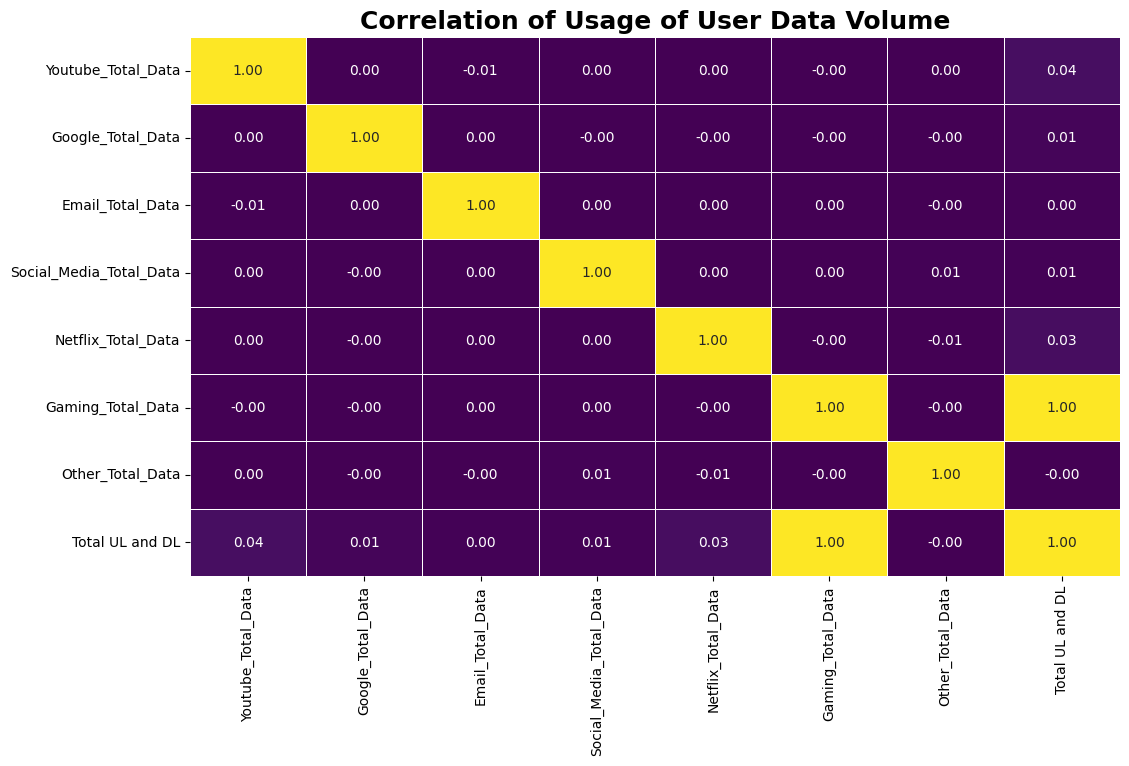

In [49]:
plot_heatmap(corr, "Correlation of Usage of User Data Volume")

Dominance of Gaming: The perfect correlation between Gaming_Total_Data and Total UL and DL suggests that gaming data usage dominates or overlaps with the total data metric. This could indicate gaming as the primary driver of overall network usage or a potential data logging issue.

**Recommendation**

1. Consider allocating more bandwidth and resources to gaming services to ensure smooth performance for heavy users.

2. **Enhance Netflix and YouTube Data Insights :** Explore why video-streaming services, expected to consume significant bandwidth, show weak correlations with total data usage. This might indicate underutilization or alternative entertainment platforms.

3. **Segment Users Based on Usage Patterns:**

- Identify users with heavy gaming activity and provide tailored plans or network optimizations for their needs.
- Analyze the minimal users of Email and Other services to explore strategies for boosting engagement in these categories.

#### Dimensionality Reduction

In [50]:
numeric_df = user_ratio_usage.select_dtypes(include="float64")

In [51]:
numeric_df.describe()

Dur. (ms)      MSISDN/Number  Youtube_Total_Data  Google_Total_Data  \
count  139602.00          139602.00           139602.00          139602.00   
mean   103646.21     42431560283.37               22.64               7.81   
std     79237.08   2527930609697.19                9.25               3.52   
min      7142.00     33601001722.00                0.08               0.04   
25%     57643.50     33651512849.00               15.99               4.94   
50%     86399.00     33663696180.00               22.67               7.82   
75%    130419.75     33683413922.00               29.30              10.69   
max   1859336.00 882397108489451.00               45.19              15.53   

       Email_Total_Data  Social_Media_Total_Data  Netflix_Total_Data  \
count         139602.00                139602.00           139602.00   
mean               2.26                     1.83               22.63   
std                1.07                     1.04                9.25   
min                0.01                     0.00                0.10   
25%                1.36                     0.93               15.98   
50%                2.26                     1.83               22.64   
75%                3.16                     2.73               29.27   
max                4.52                     3.65               45.20   

       Gaming_Total_Data  Other_Total_Data  Total UL and DL  
count          139602.00         139602.00        139602.00  
mean              430.05            429.64           495.48  
std               244.10            243.27           244.45  
min                 0.31              0.15            28.96  
25%               218.35            219.00           284.16  
50%               431.11            430.35           496.36  
75%               641.34            640.37           706.35  
max               859.20            859.52           955.98

In [52]:

scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler()

In [53]:
scaled_data = scaler.transform(numeric_df)

In [54]:

pca = PCA(n_components=10)
pca.fit(numeric_df)

PCA(n_components=10)

In [55]:
x_pca = pca.transform(scaled_data)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Second Principal Component')

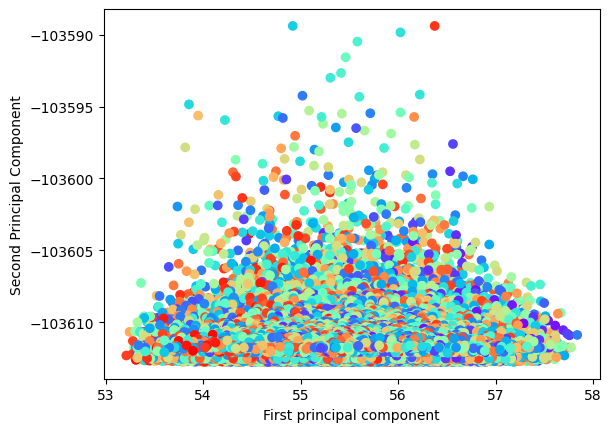

In [56]:
plt.scatter(x_pca[:,4],x_pca[:,1],c=user_ratio_usage['Total UL and DL'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Cumulative explained variance')

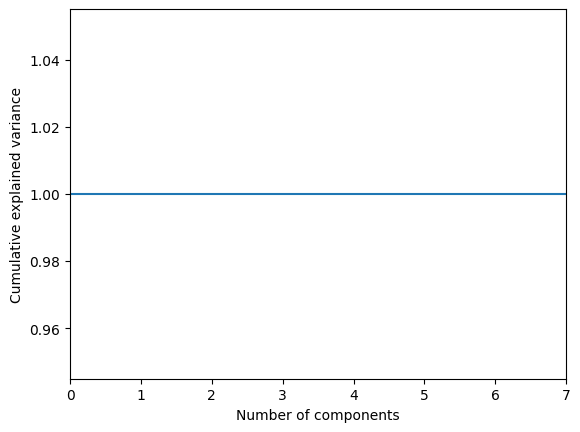

In [62]:
# compare pca number of components with logistic regression algorithm for classification

pca = PCA().fit(numeric_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [58]:

sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(numeric_df)
Y_sklearn

array([[-8.76659804e+09,  1.72001295e+06, -2.08963340e+02,
        -2.50734243e+02,  1.06013872e+01,  8.91312652e-01],
       [-8.74970587e+09,  1.26146494e+06,  2.71649378e+02,
         1.12689485e+02, -3.04195079e+01, -1.66303619e+00],
       [-8.67093315e+09,  1.25812287e+06, -2.79021049e+02,
        -1.64083063e+01, -1.29743912e+01, -6.59441057e+00],
       ...,
       [-8.76811032e+09, -5.66904435e+03,  2.90214754e+02,
         2.86073820e+02, -1.24690266e+01,  1.31768647e+01],
       [-8.80967018e+09, -5.39001106e+03,  1.91404649e+02,
        -2.96512970e+02,  5.38361066e+00, -6.78747311e+00],
       [-8.81193823e+09, -5.72901005e+03, -1.20889450e+02,
         3.86031617e+02,  1.53655909e+01, -3.17679139e-01]])

In [59]:
# Create a clean user overview file in CSV format
user_ratio_usage.to_csv('../data/user_overview_data.csv',index=False)